# CSE5311: Numerical Methods for Data Analytics
## Homework 1
### Linear Algebra Review

Import any necessary libraries.  Remember to put in the magic line to get the plots to show up right in the notebook.

Mawaba Pascal Dao
CSE5311
Dr.Peter
02/12/2021
HW1

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Vectors
Define the following three vectors as numpy arrays:
$u = [2,5,0,4,8]$,
$v = [0,-3,2,-1,1]$,
$w = [1,-1,0,0,7]$

In [2]:
# Insert code here
u = np.array([2,5,0,4,8]) # adding an axis will make tranpose operations easier
v = np.array([0,-3,2,-1,1])
w = np.array([1,-1,0,0,7])

print(f'u:{u}')
print(f'v:{v}')
print(f'w:{w}')


u:[2 5 0 4 8]
v:[ 0 -3  2 -1  1]
w:[ 1 -1  0  0  7]


Calculate the following: <br>
(a) $u^Tv = u \cdot v$ <br>
(b) $(u \cdot v)w$ <br>
(c) $ \cos(\theta) = \frac{u \cdot v}{\|u\| \|v\|}$ Note: Have your code calculate the value of $\theta$ in radians (default)

In [3]:
# Insert code for (a) here
print(u.reshape((1,5)).T.dot(v.reshape((1,5))))
print(u.dot(v))


[[  0  -6   4  -2   2]
 [  0 -15  10  -5   5]
 [  0   0   0   0   0]
 [  0 -12   8  -4   4]
 [  0 -24  16  -8   8]]
-11


In [4]:
# Insert code for (b) here
(u.dot(v))*w

array([-11,  11,   0,   0, -77])

In [5]:
# Insert code for (c) here
def eunorm(x):
    return np.linalg.norm(x, ord=2)
    
np.arccos(u.dot(v)/(eunorm(u)*eunorm(v))) 

1.8463093542573734

## Projections
Create the projection matrix to project the vector $u=[1,1,1]$ onto the vector $e=[1,0,0]$.  Explicitly print out the projection matrix's size and elements.

In [6]:
# Insert code to create the projection matrix and print its contents and size.
def findProj(a):
    return (a*a.T)/((a.T).dot(a))

u = np.array([1,1,1])
e = np.array([1,0,0])
# e[np.newaxis].T

P = findProj(e[np.newaxis].reshape((3,1)))

print(P.shape)
print(P)
P.dot(u)
# print('Note that this acutally represents the projection of e onto u\nBut the problem asks for u onto e.')




(3, 3)
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([1., 0., 0.])

Now project the same vector $u$ onto the subspace defined by the following two vectors: $e_1=[1,0,0]$ and $e_2=[0,1,0]$.  Create the projection matrix and explicitly print out its size and elements.

In [7]:
# Insert code to create the projection matrix and print its contents and size.
def inv(x):
    return np.linalg.inv(x)

e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
E_t = np.array([e1, e2])
print(E_t.shape)
E = E_t.transpose()
m = np.matmul(E_t, E)
# print(m)
m = np.matmul(E, inv(m))
P = np.matmul(m, E_t)
print(f'P: \n{P}')
Pu = P.dot(u)
print(f'Pu: \n{Pu}')

# print(inv(E.T*E))
# E*inv(E.T*E)*E.T

(2, 3)
P: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
Pu: 
[1. 1. 0.]


Using python's visualization capabilities, make a visualization illustrating the projection.  Something like this one:
<img src="vectorProj.png" height="180" width="180">

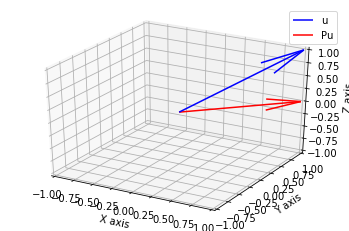

In [64]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(0,0,0,u[0],u[1],u[2], label="u", color='b')
ax.quiver(0,0,0,Pu[0],Pu[1],Pu[2], label="Pu", color='r')
ax.legend()
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## Eigenvalues and Eigenvectors
Obtain the eigenvalues and eigenvectors of this matrix:
$$
A = \begin{bmatrix}
    3    &   2 & 4 \\
    2    &   0 & 2 \\
    4    &   2 & 3
\end{bmatrix}
$$

In [9]:
# Define A and print it.
A = np.array([[3,2,4], [2,0,2],[4,2,3]])
print(f'A:\n{A}')


A:
[[3 2 4]
 [2 0 2]
 [4 2 3]]


In [10]:
# Compute eignevectors and eigenvalues.
vals, vecs = np.linalg.eig(A)
print(f'Eigen vals:\n{vals}')
print(f'Eigen vecs:\n{vecs[0]}\n{vecs[1]}\n{vecs[2]}')

Eigen vals:
[-1.  8. -1.]
Eigen vecs:
[-0.74535599  0.66666667 -0.21539222]
[ 0.2981424   0.33333333 -0.77010996]
[0.59628479 0.66666667 0.6004472 ]


Provide a brief description on the relationship between $A$ and resulting eigenvectors.  If you make a claim about the eigenvectors, illustrate the property numerically.

An eigenvector of A is any vector that stays on its own span after the A transform is applied to that vector. On such a vector the A transofrm only has after scaling effect. The factor by which the vector is scale is its associated eigenvalue such that:
$$
Ax = \lambda x
$$
Where $x$ is an eigenvector and $\lambda$ is its associated eigenvalue

In [11]:
# Any supporting code for above question.

Create a projection matrix that projects some random data from 2D, i.e. $\mathbb{R}^2$, to the subspace spanned by the eigenvector associated with largest eigenvalue.  You will need to look up how to create some random points in 2D.  

In [47]:
# Create random points in 2D.
data = np.matrix(np.random.random((2,2)))
vals, vecs = np.linalg.eig(data)
print(vals)
print(vecs)
# print(data)
# data[:,0][1]
# vecs.argmax()



[1.05386191 0.6392823 ]
[[ 0.98772464 -0.84701548]
 [ 0.15620508  0.53156822]]


In [68]:
# Setup projection matrix and project the data.
eigvec = vecs[vals.argmax()]
P = findProj(eigvec.reshape((2,1)))
print(f'Proj matrix:\n{P}')

Proj = P.dot(data)

print(f'Projection:\n{Proj}')

Proj matrix:
[[ 0.57624317 -0.49415279]
 [-0.49415279  0.42375683]]
Projection:
[[ 0.53331877 -0.05308843]
 [-0.4573433   0.04552556]]


Now create visualization that shows the original 2D data, the eigenvector, and all the projected data on the eigenvector subspace (i.e. a line).

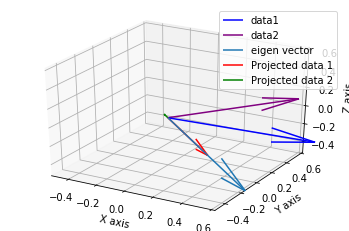

In [72]:
# Plot visualization.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0,data[:,0][0],data[:,0][1],0, label="data1", color='b')
ax.quiver(0,0,0,data[:,1][0],data[:,1][1],0, label="data2", color='purple')
ax.quiver(0,0,0,eigvec[0,0], eigvec[0,1],0, label="eigen vector")
ax.quiver(0,0,0,Proj[:,0][0],Proj[:,0][1],0, label="Projected data 1", color='r')
ax.quiver(0,0,0,Proj[:,1][0],Proj[:,1][1],0, label="Projected data 2", color='g')
ax.legend()
ax.set_xlim([-0.5, 0.6])
ax.set_ylim([-0.5, 0.6])
ax.set_zlim([-0.5, 0.6])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()